### T V V Yashwanth
Data Science Intern

Internship month: July

Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [5]:
#importing dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [7]:
##first 5 records of our dataset will get printed
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
##'isnull()" will returns the number of missing values in the data set
dataset.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [11]:
#information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


<AxesSubplot:>

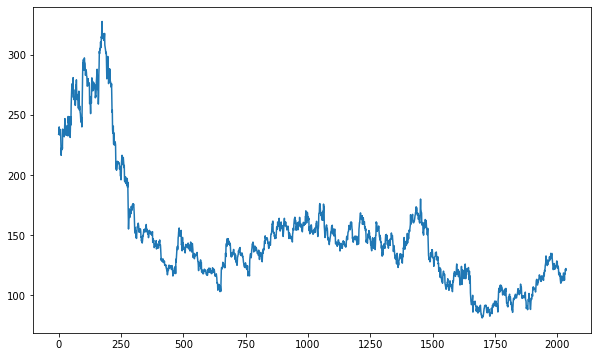

In [13]:
#plotting our data
dataset['Open'].plot(figsize=(10,6))

In [15]:
#7 days rolling mean of our stock
#first 20 data will show
dataset.rolling(7).mean().head(20)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
7,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
8,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714
9,233.185714,237.728571,230.171429,234.928571,234.928571,3.527693e+06,8241.347143


<AxesSubplot:>

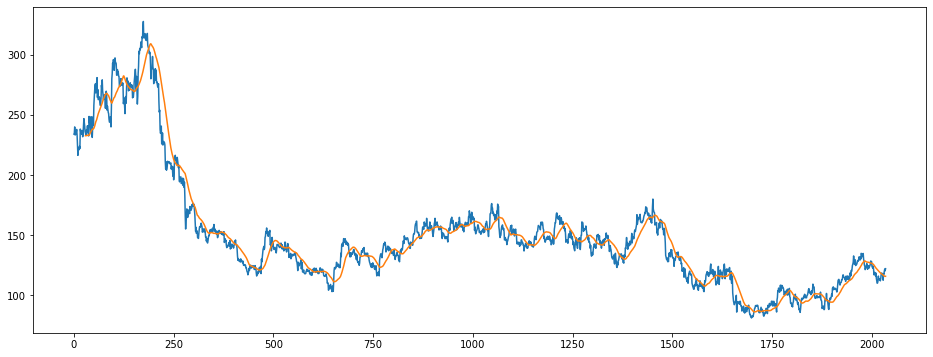

In [20]:
#rolling mean in "orange" and a previous graph in "blue"
#basically gives the moving average of past 30 days
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:>

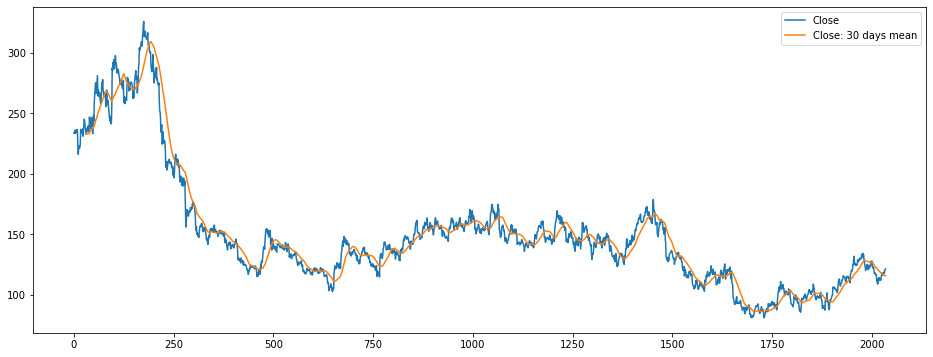

In [22]:
#plot the closed column VS the seven day moving averageof the closed column
dataset['Close: 30 days mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 days mean']].plot(figsize=(16,6))
#blue line: close price column
#orange line: 30 days rolling mean 

<AxesSubplot:>

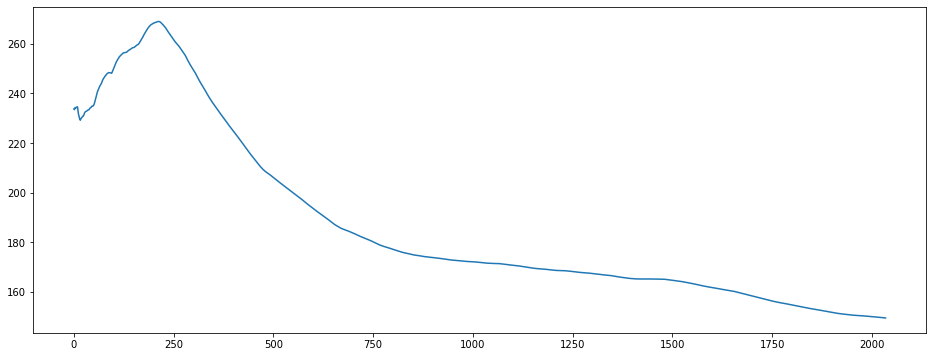

In [26]:
#specify a minimum number of periods
#min no of observation per window which is of 30 days
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [28]:
#first DataFrame : Training set
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [29]:
#data cleaning
dataset.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
Close: 30 days mean      True
dtype: bool

In [31]:
#feature scaling from scikit-learn library
#MinMaxScaler: to transform feature by scaling each of them to set range.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [34]:
#creating a DS with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [37]:
#reshaping 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [39]:
#importing keras libraries
from keras.models import Sequential
from keras.layers import Dense      
from keras.layers import LSTM
from keras.layers import Dropout

In [41]:
#for time series data we need regressor 
regressor = Sequential()

In [44]:
#adding the 1st LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#dropout technique used for reducing overfitting in neural networks

#adding the 2nd LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

#adding the 3rd LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

#adding the 4th LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#adding the output layer
regressor.add(Dense(units = 1))

In [45]:
#compilling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#fitting the RNN to the train test
#epochs= frame of time in machine learning, indicated the number of passes through the entire traing dataset
regressor.fit(X_train,y_train, epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 17s 140ms/step - loss: 0.0242
Epoch 2/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0045
Epoch 3/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0035
Epoch 6/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0037
Epoch 7/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0035
Epoch 8/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0033
Epoch 9/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0030
Epoch 10/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0031
Epoch 12/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0028
Epoch 13/100

In [52]:
#making the prediction and visulising the results

#getting the real stock price
dataset_test = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv", index_col="Date",parse_dates=True)

In [54]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [56]:
dataset_test.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [58]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [60]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [62]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2035 non-null   float64
dtypes: float64(1)
memory usage: 31.8 KB


In [65]:
#getting the predicted stock price 
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [67]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


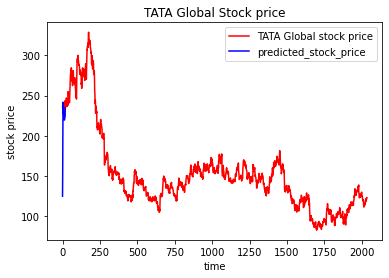

In [69]:
#visulising the data
plt.plot(real_stock_price, color='red',label='TATA Global stock price')
plt.plot(predicted_stock_price, color='blue', label='predicted_stock_price')
plt.title('TATA Global Stock price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()